In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [187]:
dt_train=pd.read_excel(r'/content/drive/MyDrive/train_agriculture.xlsx')
dt_test=pd.read_excel(r'/content/drive/MyDrive/test_agriculture.xlsx')
dt=dt_train
dt.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [188]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [189]:
dt.shape

(88858, 10)

In [190]:
dt.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [191]:
dt.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [192]:
### replacing the null values with mean of the Number_Weeks_Used i.e 28.623970
dt['Number_Weeks_Used'].fillna(dt['Number_Weeks_Used'].mean(),inplace=True)

In [193]:
dt.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [194]:
dt.nunique()

ID                         88858
Estimated_Insects_Count       71
Crop_Type                      2
Soil_Type                      2
Pesticide_Use_Category         3
Number_Doses_Week             20
Number_Weeks_Used             65
Number_Weeks_Quit             51
Season                         3
Crop_Damage                    3
dtype: int64

In [195]:
dt.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

# EDA

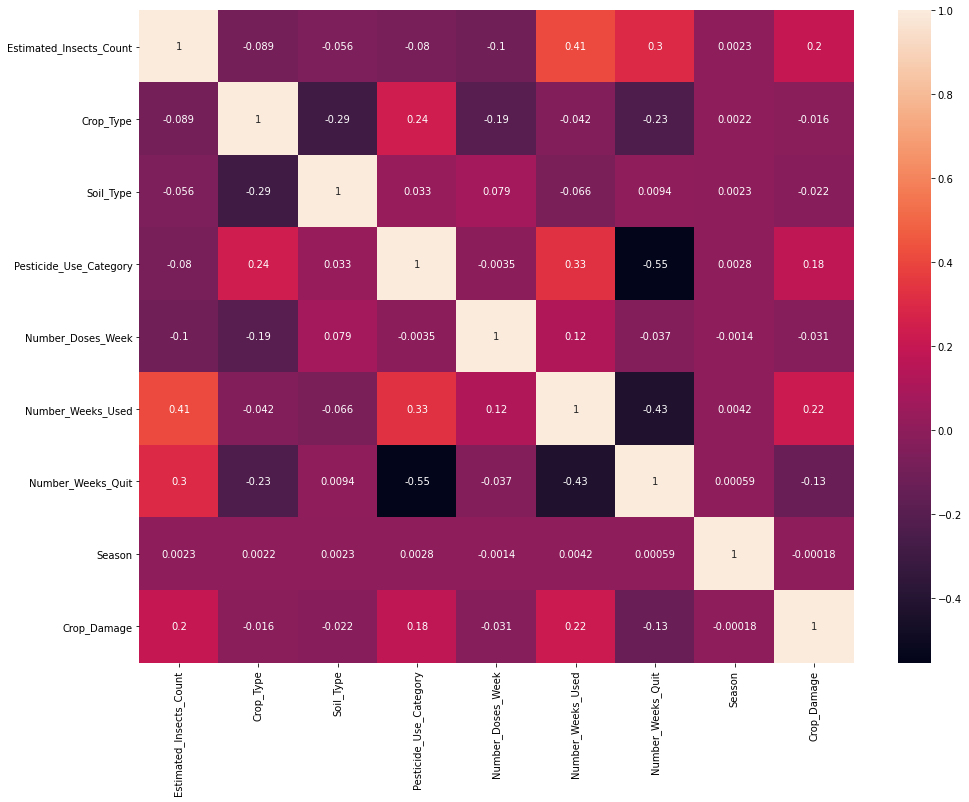

In [196]:
plt.figure(figsize=(16,12))
sns.heatmap(dt.corr(),annot=True)

### Observations

1. Estimated_Insects_Count, Pesticide_Use_Category, Number_Weeks_Used are positively corelated to the crop_damage

2. Pesticide_Use_Category and Number_Weeks_Quit are highly negatively corelated to each other


Text(0.5, 1.0, 'Crop type and Damage')

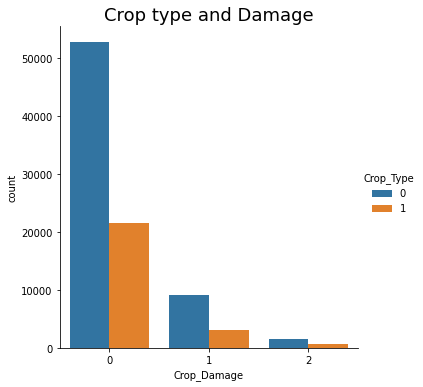

In [197]:
sns.catplot(data=dt,x='Crop_Damage',kind='count',hue='Crop_Type')

plt.title('Crop type and Damage',fontsize=18)

### **Observation**

1. Crop damage due to pesticides are less in comparison to damage due to other causes.
2. Crop type 0 has higher chance of survival compared to crop type 1.

Text(0.5, 1.0, 'Soil type and Damage')

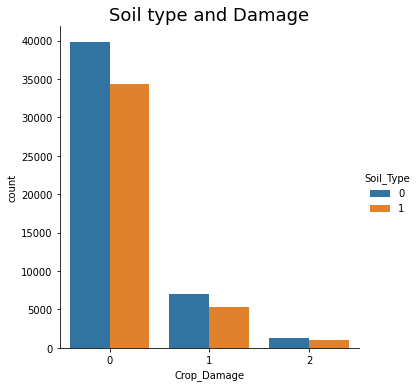

In [198]:
sns.catplot(data=dt,x='Crop_Damage',kind='count',hue='Soil_Type')
plt.title('Soil type and Damage',fontsize=18)

### **observations**

1. In soil type 0 crop surivival chances more than type 1 soil.

2. Damage due to the other causes are higher in type 0 soil as compared to type 1 soil

Text(0.5, 1.0, 'Damage and Pesticide_use_category')

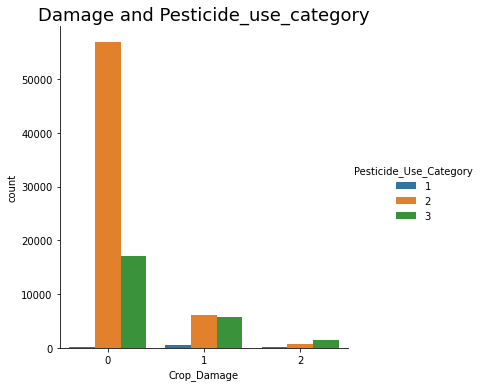

In [199]:
sns.catplot(data=dt,x='Crop_Damage',kind='count',hue='Pesticide_Use_Category')
plt.title('Damage and Pesticide_use_category',fontsize=18)

### **Observations**

1. pesticide use category 2 has higher chances of servival crop.

Text(0.5, 1.0, 'Damage Vs Season')

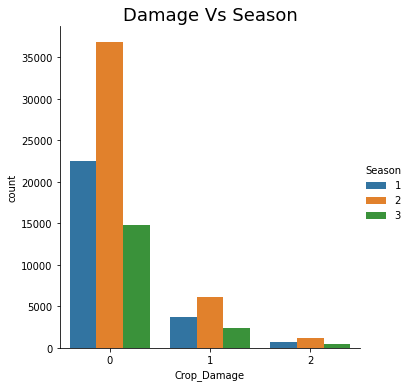

In [200]:
sns.catplot(data=dt,x='Crop_Damage',kind='count',hue='Season')
plt.title('Damage Vs Season',fontsize=18)

### **Obsevations**

1. In Season 2 crop survive more than another seasons

2. In season 2 crop damage due to other causes high as compared to season 1 and 3

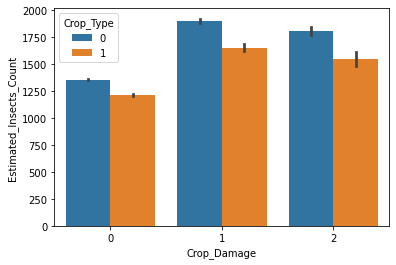

In [201]:

sns.barplot(x="Crop_Damage" ,y="Estimated_Insects_Count",hue="Crop_Type",data=dt)

### **Observations:**
Clearly observed that Most insect attacks are done on crop type 0.

## **Outliers analysis**

In [202]:
dt.drop(columns=['ID'],inplace=True)

Estimated_Insects_Count       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Crop_Type                  AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Soil_Type                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Pesticide_Use_Category     AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Number_Doses_Week          AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Number_Weeks_Used             AxesSubplot(0.125,0.593621;0.133621x0.130172)
Number_Weeks_Quit          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Season                      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Crop_Damage                AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

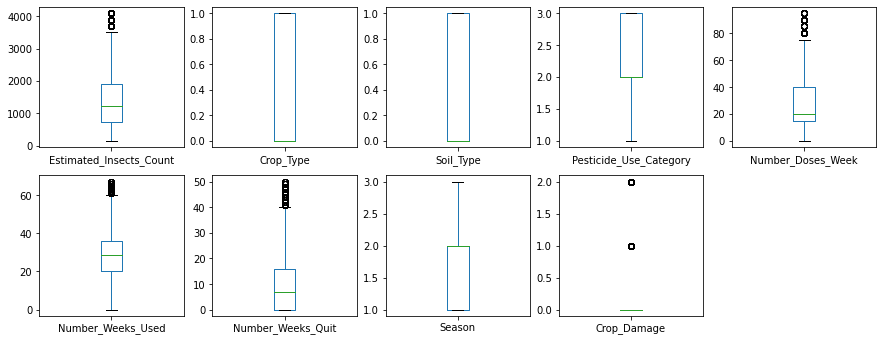

In [203]:
dt.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,15))

In [204]:
### filling each outlier value with mean of that particular variable

dt.loc[dt['Estimated_Insects_Count']>3500,'Estimated_Insects_Count']=np.mean(dt['Estimated_Insects_Count'])
dt.loc[dt['Number_Doses_Week']>80,'Number_Doses_Week']=np.mean(dt['Number_Doses_Week'])
dt.loc[dt['Number_Weeks_Used']>60,'Number_Weeks_Used']=np.mean(dt['Number_Weeks_Used'])
dt.loc[dt['Number_Weeks_Quit']>40,'Number_Weeks_Quit']=np.mean(dt['Number_Weeks_Quit'])

Estimated_Insects_Count       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Crop_Type                  AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Soil_Type                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Pesticide_Use_Category     AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Number_Doses_Week          AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Number_Weeks_Used             AxesSubplot(0.125,0.593621;0.133621x0.130172)
Number_Weeks_Quit          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Season                      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Crop_Damage                AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

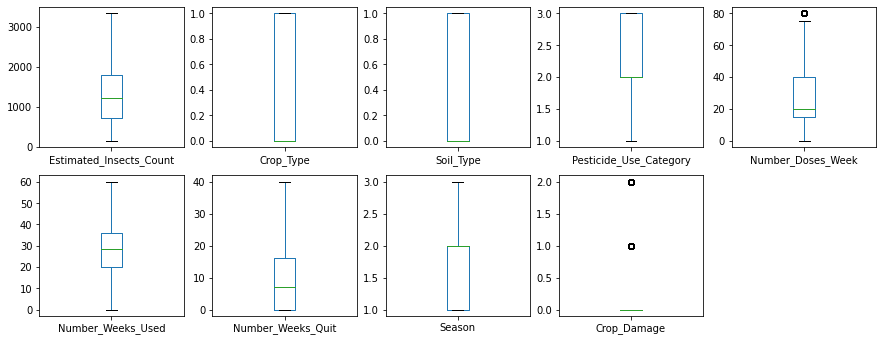

In [205]:
dt.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,15))

## **Skewness analysis**

In [206]:
dt.skew()

Estimated_Insects_Count    0.647325
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.911044
Number_Weeks_Used          0.213554
Number_Weeks_Quit          0.831183
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f339c1d82d0>,
      dtype=object)

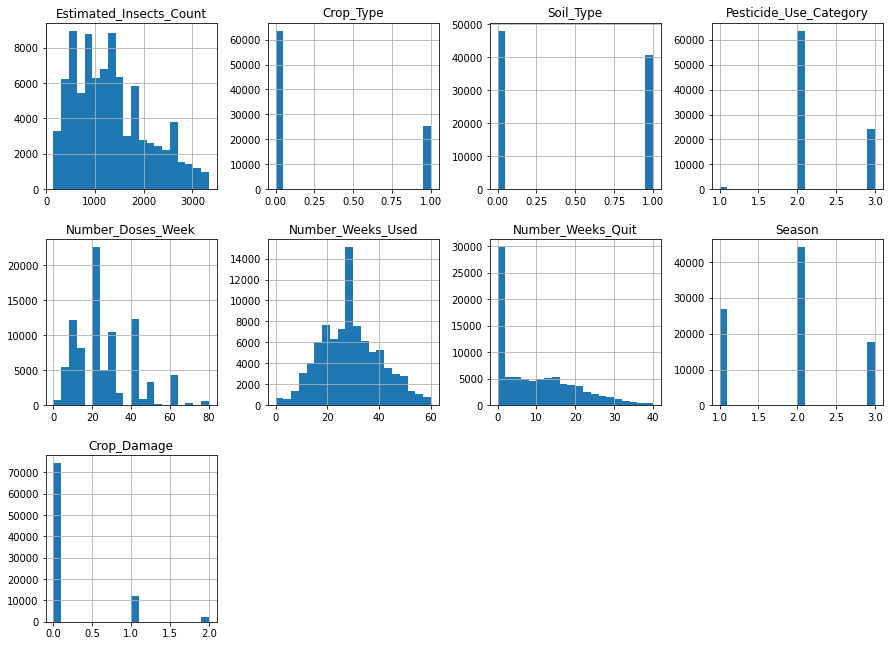

In [207]:
dt.hist(layout=(4,4),figsize=(15,15),bins=20)

## **Model Building**

In [208]:
x=dt.drop(columns=['Crop_Damage'])
y=dt[['Crop_Damage']]

## **Standardization**

In [209]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [210]:
x_sc=sc.fit_transform(x)

## **Split data into train and test**

In [211]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.2,random_state=20)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((71086, 8), (17772, 8), (71086, 1), (17772, 1))

# 1. Random Forest  

In [212]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

In [213]:
rf.score(x_test,y_test)

0.8288881386450596

In [214]:
cm=confusion_matrix(y_test,rf_pred)
cm

array([[14149,   646,    95],
       [ 1777,   561,    69],
       [  312,   142,    21]])

In [215]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     14890
           1       0.42      0.23      0.30      2407
           2       0.11      0.04      0.06       475

    accuracy                           0.83     17772
   macro avg       0.47      0.41      0.42     17772
weighted avg       0.79      0.83      0.80     17772



## **2. Decision Tree**

In [216]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [217]:
DT.fit(x_train,y_train)
DT_pred=DT.predict(x_test)

In [218]:
DT.score(x_test,y_test)

0.7554017555705604

In [219]:
cm=confusion_matrix(y_test,DT_pred)
cm

array([[12706,  1840,   344],
       [ 1600,   683,   124],
       [  287,   152,    36]])

In [220]:
print(classification_report(y_test,DT_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     14890
           1       0.26      0.28      0.27      2407
           2       0.07      0.08      0.07       475

    accuracy                           0.76     17772
   macro avg       0.40      0.40      0.40     17772
weighted avg       0.77      0.76      0.76     17772



## 3. KNearestNeighbors

In [221]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)

In [222]:
knn.score(x_test,y_test)

0.8284942606347063

In [223]:
cm=confusion_matrix(y_test,knn_pred)
cm

array([[14207,   669,    14],
       [ 1873,   509,    25],
       [  332,   135,     8]])

In [224]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     14890
           1       0.39      0.21      0.27      2407
           2       0.17      0.02      0.03       475

    accuracy                           0.83     17772
   macro avg       0.47      0.39      0.40     17772
weighted avg       0.78      0.83      0.80     17772



## **4.naive_bayes**

In [225]:
from sklearn.naive_bayes import GaussianNB

In [226]:
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_pred=nb.predict(x_test)

In [227]:
nb.score(x_test,y_test)

0.8237114562232726

In [228]:
cm=confusion_matrix(y_test,nb_pred)
cm

array([[14161,   729,     0],
       [ 1930,   477,     0],
       [  347,   127,     1]])

In [229]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     14890
           1       0.36      0.20      0.26      2407
           2       1.00      0.00      0.00       475

    accuracy                           0.82     17772
   macro avg       0.74      0.38      0.39     17772
weighted avg       0.80      0.82      0.79     17772



## **Adaboost classifier**

In [230]:
#Using adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=10,learning_rate=1)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8435741616025209
[[14868    22     0]
 [ 2283   124     0]
 [  443    32     0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     14890
           1       0.70      0.05      0.10      2407
           2       0.00      0.00      0.00       475

    accuracy                           0.84     17772
   macro avg       0.51      0.35      0.34     17772
weighted avg       0.80      0.84      0.78     17772



### **But overall it gives good accuracy among all models so we save as our final model.**

In [233]:
dt_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [234]:
dt_test.drop(columns=['ID'],inplace=True)
dt_test['Number_Weeks_Used'].fillna(dt_test['Number_Weeks_Used'].mean(),inplace=True)

In [239]:
outcome_pred=ad.predict(dt_test)

In [242]:
#Dataframe for Crop outcome prediction
outcome_pred=pd.DataFrame(outcome_pred,columns=["Crop_Damage"])

In [245]:
outcome_pred.to_csv('Crop_Damage_Predictions.csv',index=False)